<a href="https://colab.research.google.com/github/Aminfaraji/time-series/blob/main/stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as K
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
gold=pd.read_csv("/content/drive/My Drive/Lotus.Gold.Com.ETF.csv",usecols=['<HIGH>','<OPEN>'])
gold[:]=gold.iloc[::-1].values

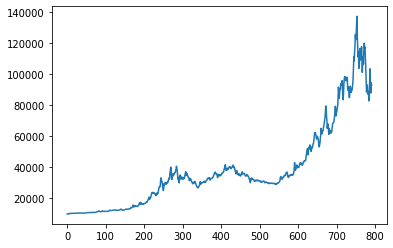

In [33]:
plt.plot(gold["<OPEN>"])

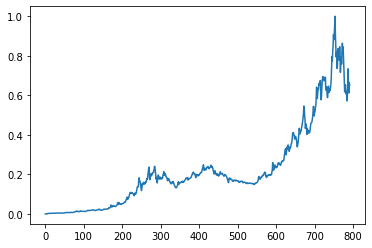

In [34]:
dataset=gold.filter(["<OPEN>"])
data=dataset
dataset=dataset.values
normal=MinMaxScaler()
dataset=normal.fit_transform(dataset)
plt.plot(dataset)

In [35]:
len_X_train=634
X_train=dataset[0:len_X_train,:]
X=[]
Y=[]
for i in range(30,len(X_train)):
  X.append(X_train[i-30:i,0])
  Y.append(X_train[i,0])
X=np.array(X)
Y=np.array(Y)
X=X.reshape((len(X),30,1))

In [47]:
model=K.models.Sequential()
model.add(K.layers.LSTM(50,return_sequences=True,input_shape=(X.shape[1],1)))
model.add(K.layers.LSTM(50,return_sequences=True))
model.add(K.layers.LSTM(50,return_sequences=1))
model.add(K.layers.LSTM(50))
model.add(K.layers.Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [48]:
model.fit(X,Y,epochs=100,batch_size=32)

Epoch 1/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0052
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 6.3871e-04
Epoch 3/100
19/19 [==============================] - 0s 9ms/step - loss: 4.3910e-04
Epoch 4/100
19/19 [==============================] - 0s 9ms/step - loss: 4.1654e-04
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 4.3011e-04
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 4.0513e-04
Epoch 7/100
19/19 [==============================] - 0s 10ms/step - loss: 3.7213e-04
Epoch 8/100
19/19 [==============================] - 0s 9ms/step - loss: 3.5273e-04
Epoch 9/100
19/19 [==============================] - 0s 9ms/step - loss: 3.3872e-04
Epoch 10/100
19/19 [==============================] - 0s 10ms/step - loss: 3.3183e-04
Epoch 11/100
19/19 [==============================] - 0s 9ms/step - loss: 3.1710e-04
Epoch 12/100
19/19 [==============================] - 0s 10ms/step - los

In [49]:
test_data=dataset[len_X_train-30:,:]# be scale
x=[]
y=gold.iloc[len_X_train:,1]# not scale 
for i in range(30,len(test_data)):
  x.append(test_data[i-30:i,0])
x=np.array(x)
x=x.reshape((len(x),30,1))

In [50]:
pred=model.predict(x)
pred=normal.inverse_transform(pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


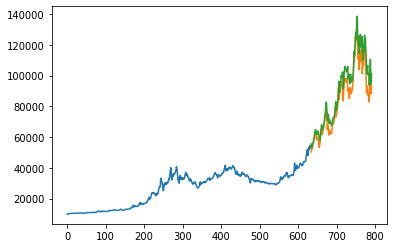

In [51]:
train=data[:len_X_train]
valid=data[len_X_train:]
valid["pred"]=pred
plt.plot(train["<OPEN>"])
plt.plot(valid[["<OPEN>","pred"]])

In [52]:
# result=np.array([0.0]*230).reshape((230,1))
# result[0:30]=x[-1]
# for i in range(200):
#   pred=model.predict(result[i:i+30].reshape((1,30,1)))
#   result[i+30]=pred


In [54]:
# result_re=normal.inverse_transform(result)
# data=pd.concat([data["<OPEN>"],pd.DataFrame(result_re)],ignore_index=True)
# plt.plot(data)
# plt.plot(gold["<OPEN>"])